SVM were initially developed in the 1960s and then were refined again the 1990s.

SVM is a linear model. You will see that easily in the practical sections of this course, when visualizing the results on the graph (you will notice that the prediction boundary is a straight line). However we can make the SVM a non linear model, by adding a kernel,

We need to find a value of C which will not make the solution be impacted by the noisy data.

Why C is smaller, margin is larger

A large C parameter tells the SVM to try to classify all the examples correctly

When would you chose a Gaussian? If n(features) is small and/or m(instances) is large

The purpose is finding the maximum margin

Support Vectors(Points in 2D) are supporting the decision boundary or the way we build the  whole algorithm

Decision boundary is Maximum Margin Hyperplane(Line in 2D) or Maximum Margin Classifier

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

### Review data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


### Split data into the independent vs dependent variables

In [6]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

### Split data into train and test sets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc_X = StandardScaler()

In [11]:
X_train = sc_X.fit_transform(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
X_test = sc_X.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting ---------- Model to train dataset

In [13]:
from sklearn.svm import SVC #support vector classifier

In [30]:
classifier = SVC(kernel= 'linear',random_state=0)#rbf-radial basis function: gaussian kernel

In [31]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [32]:
y_pred =  classifier.predict(X_test)

### Making the confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[63,  5],
       [ 7, 25]])

|  Predicted \Actual Values| 1 | 0 |
| --- | --- | --- |
| 1 | TP =63 | FP =5 |
| 0 | FN = 7 | TN = 25 |


### Visualising the  Training set results

In [20]:
from matplotlib.colors import ListedColormap

In [21]:
X_set, y_set = X_train, y_train

In [22]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.6884311278377804, 3.431568872162089)

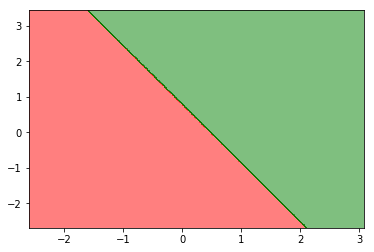

In [35]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

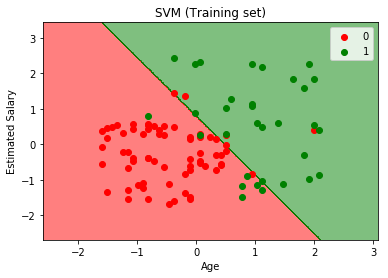

In [36]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red','green'))(i),label =j  )
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

In [25]:
from matplotlib.colors import ListedColormap

In [26]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.6884311278377804, 3.431568872162089)

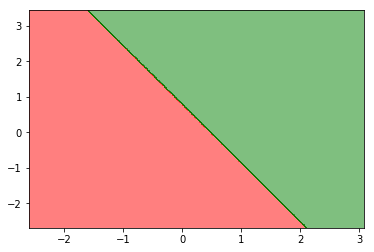

In [37]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

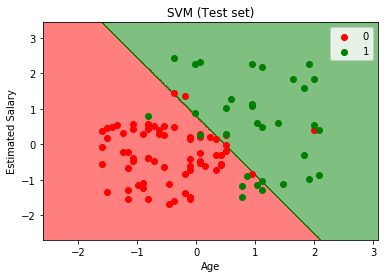

In [38]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red','green'))(i),label =j  )
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()